# CWordTM Toolkit Usage on BBC News

This Jupyter notebook demonstrates how to use the package "CWordTM" 
on the BBC News:

1. Meta Information Features
1. Utility Features
1. Text Visualization - Word Cloud
1. Text Summarization
1. Topic Modeling - LDA

### CWordTM Toolkit's Documentation: https://cwordtm.readthedocs.io

In [1]:
import warnings
warnings.filterwarnings('ignore')

## 1. Meta Information Features

In [2]:
import cwordtm
from cwordtm import *
cwordtm.__version__

'0.6.4'

In [3]:
# Show brief module information
# print(meta.get_module_info())

# Show function signature of all functions in a submodule
print(meta.get_submodule_info("viz"))

The function(s) of the submodule 'cwordtm.viz':

   chi_wordcloud (docs, figsize=(15, 10), bg='white', image=0, *, timing=False, code=0)
   plot_cloud (wordcloud, figsize, *, timing=False, code=0)
   show_wordcloud (docs, clean=False, figsize=(12, 8), bg='white', image=0, *, timing=False, code=0)



In [4]:
# Show source code of all the functions in a submodule
print(meta.get_submodule_info("viz", detailed=True))

The function(s) of the submodule 'cwordtm.viz':

def chi_wordcloud(docs, figsize=(15, 10), bg='white', image=0):
    """Prepare and show a Chinese wordcloud

    :param docs: The collection of Chinese documents for preparing a wordcloud,
        default to None
    :type docs: pandas.DataFrame
    :param figsize: Size (width, height) of word cloud, default to (15, 10)
    :type figsize: tuple, optional
    :param bg: The background color (name) of the wordcloud, default to 'white'
    :type bg: str, optional
    :param image: The filename of the presribed image as the mask of the wordcloud,
        or 1/2/3/4 for using an internal image (heart / disc / triangle / arrow),
        default to 0 (No image mask)
    :type image: int or str, optional
    """

    util.set_lang('chi')
    diction = util.get_diction(docs)

    masks = ['heart.jpg', 'disc.jpg', 'triangle.jpg', 'arrow.jpg']

    if image == 0:
        mask = None
    elif image in [1, 2, 3, 4]:  # Internal image file
        img

## 2. Utility Features

### Load BBC News

In [5]:
bbc_news = "BBC/BBC News Train.csv"
df = util.load_text(bbc_news, info=True)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


### Preprocessing Text

In [6]:
text_list = util.get_text_list(df.iloc[:500], text_col='Text')
text = util.preprocess_text(text_list)

## 3. Text Visualization - Word Cloud

C:\Dev\Anaconda3\envs\aiml\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


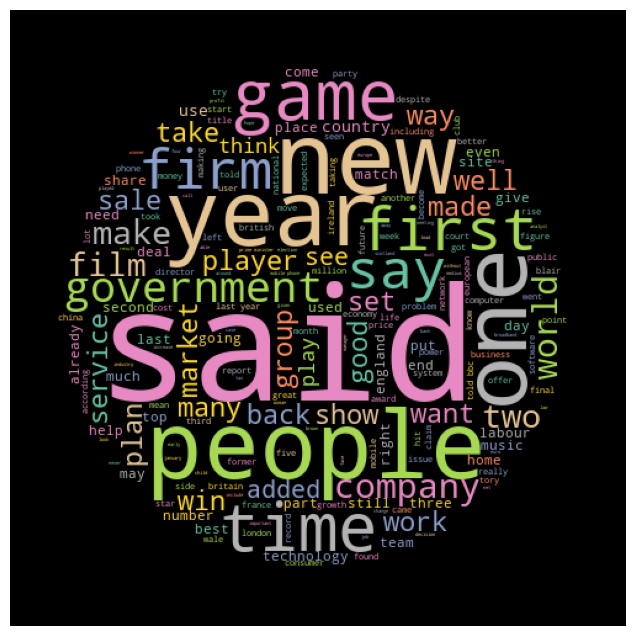

In [7]:
# Black background with the prescribed image as the mask
viz.show_wordcloud(text, bg='black', image='images/disc.png')

## 4. Text Summarization

In [8]:
news = df.iloc[:5]['Text']
ta.summary_en(news, sent_len=5)

['but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom.',
 'cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud.',
 'prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates.',
 'the university of california said the trial in the case is scheduled to begin in october 2006. it joined the lawsuit in december 2001alleging  massive insider trading  and fraud  claiming it had lost $145m on its investments in the company.',
 'th

In [9]:
# pivot.pivot(df, column='Category')

## 5. Topic Modeling

In [10]:
import warnings
warnings.filterwarnings('ignore')

### LDA Modeling

In [11]:
lda = tm.lda_process(bbc_news, source=1, text_col='Text', eval=True, timing=True)

Corpus loaded!
Text preprocessed!
Text trained!
If no visualization is shown,
  you may execute the following commands to show the visualization:
    > import pyLDAvis
    > pyLDAvis.display(lda.vis_data)
Visualization prepared!

Topics from LDA Model:
[(0,
  '0.005*"wa" + 0.005*"said" + 0.004*"ha" + 0.003*"mr" + 0.003*"year" + '
  '0.002*"film" + 0.001*"new" + 0.001*"sale" + 0.001*"company" + '
  '0.001*"people"'),
 (1,
  '0.006*"said" + 0.006*"wa" + 0.003*"ha" + 0.003*"year" + 0.003*"mr" + '
  '0.001*"time" + 0.001*"company" + 0.001*"open" + 0.001*"game" + 0.001*"bn"'),
 (2,
  '0.005*"said" + 0.004*"wa" + 0.003*"ha" + 0.002*"year" + 0.002*"rate" + '
  '0.002*"market" + 0.001*"figure" + 0.001*"new" + 0.001*"game" + '
  '0.001*"price"'),
 (3,
  '0.007*"said" + 0.006*"wa" + 0.005*"ha" + 0.002*"year" + 0.002*"mr" + '
  '0.002*"new" + 0.002*"film" + 0.001*"people" + 0.001*"government" + '
  '0.001*"uk"'),
 (4,
  '0.006*"said" + 0.005*"wa" + 0.005*"ha" + 0.003*"mr" + 0.002*"year" + '
  '0.

In [12]:
# LDA Model Visualization
import pyLDAvis
pyLDAvis.display(lda.vis_data)

### Save LDA Model

In [13]:
lda.save("models/lda_bbc.gensim")

LDA model has been stored in 'models/lda_bbc.gensim'.


### Load LDA Model

In [14]:
lda2 = tm.LDA("", lda.num_topics)
lda2.model = lda2.load("models/lda_bbc.gensim")
lda2.show_topics()


Topics from LDA Model:
[(0,
  '0.005*"wa" + 0.005*"said" + 0.004*"ha" + 0.003*"mr" + 0.003*"year" + '
  '0.002*"film" + 0.001*"new" + 0.001*"sale" + 0.001*"company" + '
  '0.001*"people"'),
 (1,
  '0.006*"said" + 0.006*"wa" + 0.003*"ha" + 0.003*"year" + 0.003*"mr" + '
  '0.001*"time" + 0.001*"company" + 0.001*"open" + 0.001*"game" + 0.001*"bn"'),
 (2,
  '0.005*"said" + 0.004*"wa" + 0.003*"ha" + 0.002*"year" + 0.002*"rate" + '
  '0.002*"market" + 0.001*"figure" + 0.001*"new" + 0.001*"game" + '
  '0.001*"price"'),
 (3,
  '0.007*"said" + 0.006*"wa" + 0.005*"ha" + 0.002*"year" + 0.002*"mr" + '
  '0.002*"new" + 0.002*"film" + 0.001*"people" + 0.001*"government" + '
  '0.001*"uk"'),
 (4,
  '0.006*"said" + 0.005*"wa" + 0.005*"ha" + 0.003*"mr" + 0.002*"year" + '
  '0.002*"new" + 0.002*"best" + 0.001*"game" + 0.001*"people" + 0.001*"film"'),
 (5,
  '0.008*"said" + 0.006*"wa" + 0.005*"ha" + 0.004*"mr" + 0.003*"year" + '
  '0.002*"people" + 0.002*"new" + 0.002*"say" + 0.002*"labour" + '
  '0.002